In [2]:
import pandas as pd
import numpy as np
import re, string
from nltk.corpus import stopwords

df_chats = pd.read_csv('cleaned_data/chats_final.csv')

df_feedback = df_chats[["answer", "satisfaction"]].dropna(subset=["answer", "satisfaction"])

df_feedback['satisfaction'] = pd.to_numeric(df_feedback['satisfaction'], errors='coerce').fillna(0)


In [3]:
stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = str(text).lower()
    text = re.sub(f"[{re.escape(string.punctuation)}]", "", text)
    text = re.sub(r"\s+", " ", text).strip()
    text = " ".join([word for word in text.split() if word not in stop_words])
    return text

In [5]:
df_feedback['cleaned_text'] = df_feedback['answer'].apply(clean_text)

print(df_feedback[["cleaned_text", "satisfaction"]].head())
print("Dataset shape:", df_feedback.shape)
df_feedback.tail()

                                        cleaned_text  satisfaction
0  traveling beirut wonderful experience depends ...             0
1  next flight beirut airport italy scheduled dep...             0
2  hello im assist travel needs could please prov...             0
3  hello traveler assistant help flight details b...             0
4  developed ibrahim fleifel xpertbot academy ass...             0
Dataset shape: (11021, 3)


,answer,satisfaction,cleaned_text
11016,"Sorry, there was an error processing your requ...",-1,sorry error processing request
11017,"Sorry, there was an error processing your requ...",-1,sorry error processing request
11018,"Sorry, there was an error processing your requ...",-1,sorry error processing request
11019,"Sorry, there was an error processing your requ...",-1,sorry error processing request
11020,"Sorry, there was an error processing your requ...",-1,sorry error processing request


In [6]:
# model building and evaluation code goes here
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
# split data
X = df_feedback['cleaned_text']
y = df_feedback['satisfaction']

# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# vectorize text data
vectorizer = TfidfVectorizer(max_features=2000,ngram_range=(1,2), min_df=2)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# train classifier
model = LogisticRegression(max_iter=200, random_state=42)
model.fit(X_train_tfidf, y_train)

# make predictions
y_pred = model.predict(X_test_tfidf)

# evaluate model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9410430839002267

Classification Report:
               precision    recall  f1-score   support

          -1       0.94      0.55      0.69        88
           0       0.94      1.00      0.97      1866
           1       0.97      0.66      0.78       251

    accuracy                           0.94      2205
   macro avg       0.95      0.73      0.81      2205
weighted avg       0.94      0.94      0.94      2205



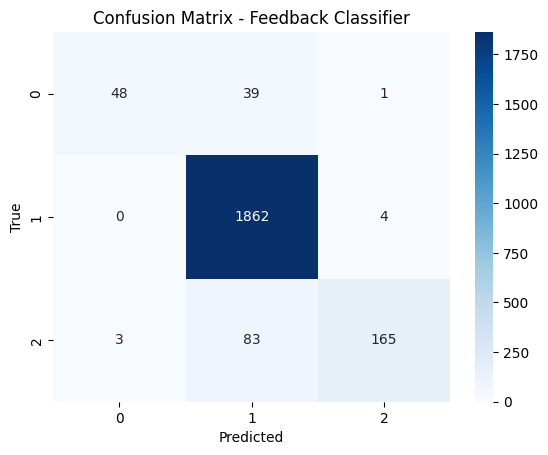

In [7]:

# Confusion matrix visualization
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix - Feedback Classifier")
plt.show()

SVC Model Accuracy: 0.9628117913832199

SVC Classification Report:
               precision    recall  f1-score   support

          -1       0.94      0.74      0.83        88
           0       0.96      1.00      0.98      1866
           1       0.97      0.80      0.87       251

    accuracy                           0.96      2205
   macro avg       0.96      0.84      0.89      2205
weighted avg       0.96      0.96      0.96      2205



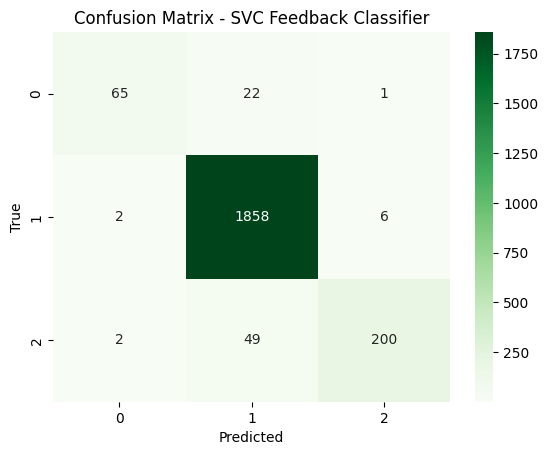

In [8]:
# Linear SVC model
from sklearn.svm import LinearSVC   
svc_model = LinearSVC(random_state=42)
svc_model.fit(X_train_tfidf, y_train)
y_svc_pred = svc_model.predict(X_test_tfidf)

print("SVC Model Accuracy:", accuracy_score(y_test, y_svc_pred))
print("\nSVC Classification Report:\n", classification_report(y_test, y_svc_pred))
# Confusion matrix visualization for SVC
cm_svc = confusion_matrix(y_test, y_svc_pred)
sns.heatmap(cm_svc, annot=True, fmt="d", cmap="Greens")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix - SVC Feedback Classifier")
plt.show()


In [9]:
import joblib

joblib.dump(svc_model, "models/svc_feedback_classifier.pkl")
joblib.dump(vectorizer, "models/feedback_tfidf.pkl")
print("✅ SVC Feedback Classifier saved successfully!")


✅ SVC Feedback Classifier saved successfully!
